In [11]:
# Set de date : Medical Cost Personal

In [12]:
# Importarea librăriilor necesare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [13]:
# Citirea fișierului
df = pd.read_csv('/content/insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [14]:
# Prelucrarea datelor
# Verificare valori lipsă
print(df.isnull().sum())

# Codificare variabile categorice folosind OneHotEncoder
categorical_cols = ['sex', 'smoker', 'region']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separare features și target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Împărțirea setului în antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [15]:
# Metoda 1: Regressie Liniară
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("=== Linear Regression ===")
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("R² Score: {:.2f}%".format(r2_lr * 100))
print("RMSE: {:.2f}".format(rmse_lr))

=== Linear Regression ===
R² Score: 78.36%
RMSE: 5796.28


In [16]:
# Metoda 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest Regression ===")
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("R² Score: {:.2f}%".format(r2_rf * 100))
print("RMSE: {:.2f}".format(rmse_rf))

=== Random Forest Regression ===
R² Score: 86.51%
RMSE: 4576.30


<ipython-input-21-a89768ee11ca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_values, palette='magma')


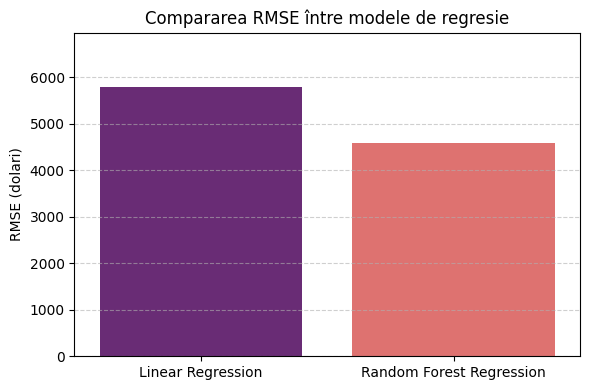

In [21]:
# Compararea RMSE între modele
models = ['Linear Regression', 'Random Forest Regression']
rmse_values = [rmse_lr, rmse_rf]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=rmse_values, palette='magma')
plt.title('Compararea RMSE între modele de regresie')
plt.ylabel('RMSE (dolari)')
plt.ylim(0, max(rmse_values) * 1.2)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

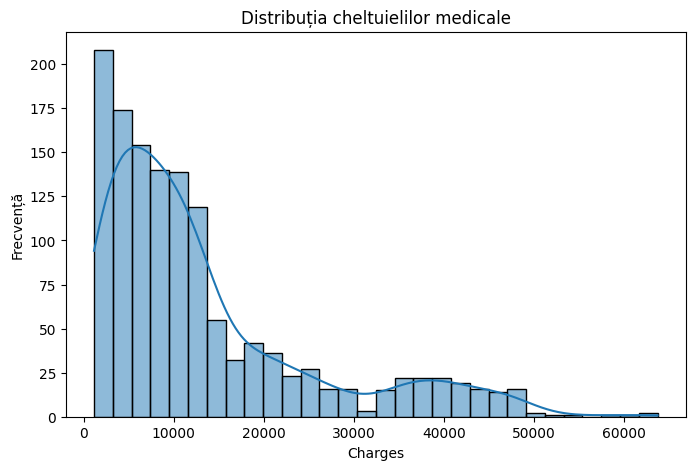

In [17]:
# Grafic 1 : Repartiția cheltuielilor medicale (charges)
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribuția cheltuielilor medicale')
plt.xlabel('Charges')
plt.ylabel('Frecvență')
plt.show()

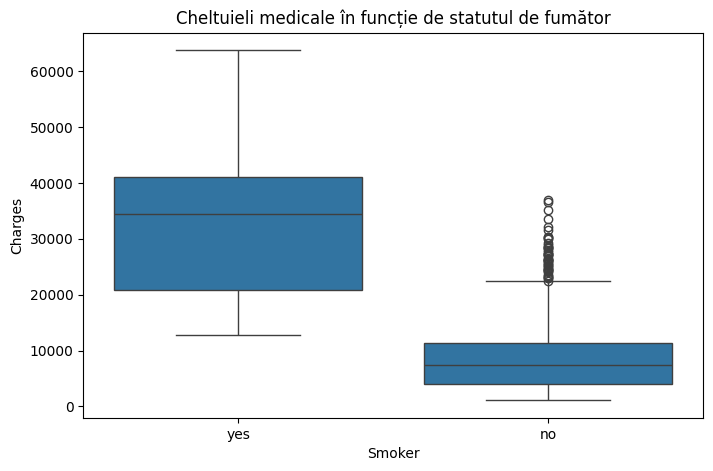

In [18]:
# Grafic 2 : Charges în funcție de fumat (smoker)
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Cheltuieli medicale în funcție de statutul de fumător')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

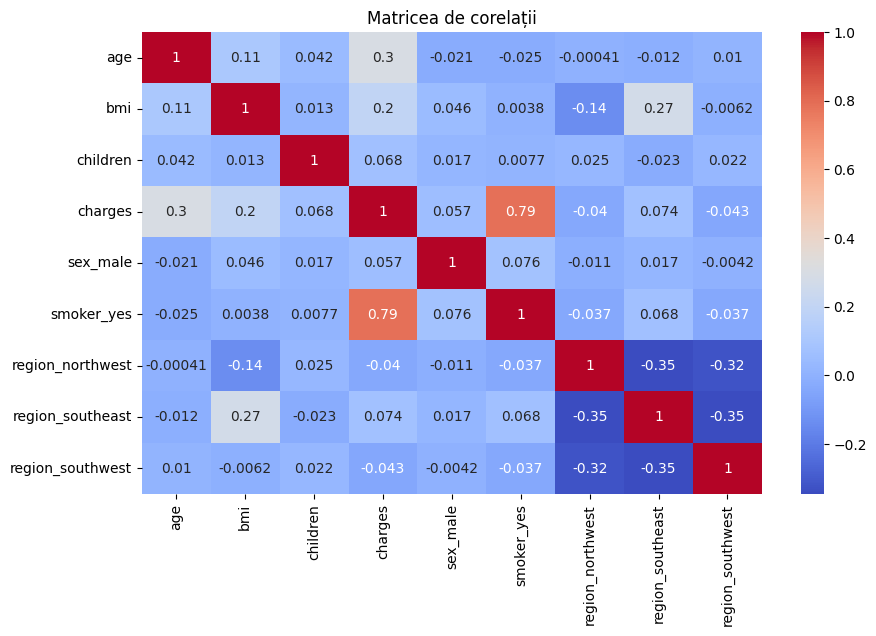

In [19]:
# Grafic 3 : Corelațiile dintre variabile
plt.figure(figsize=(10,6))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matricea de corelații')
plt.show()